# Comparing Firearm Mortality to Firearm Ownership by State

Grace Rinehart (Colorado State University)  
Kendall Landwehr (Colorado State University)  
Andrew Zimbelman (Colorado State University)

# Abstract

There is a notion that having more firearms makes a country or state “safer.” However, having more firearms per capita has been proven to worsen mortality rates. This issue is especially prevalent in the United States, where 2nd amendment rights have become a topic of debate. In this study, we aim to provide more evidence that states with high rates of firearm ownership have higher rates of firearm mortality. Using several statistical analyses, we highlight the correlations between firearm ownership and firearm mortality. Our results showed that there is a significant, positive correlation between firearm ownership and firearm mortality. The states with the highest rates of firearm ownership equally had the highest rates of firearm mortality. This trend was demonstrated to be exponential across the five states with the highest firearm ownership percentages, as shown in both a linear regression model and a bar plot. By providing more insight into firearm mortality in relation to firearm ownership, this study hopes to encourage more rigorous laws regarding firearm safety and ownership requirements.

# Introduction

Through this study, we address and provide increased analysis of the problem of firearm mortality in the United States. Gun violence is a major safety, social, and public health problem within the United States and requires additional investigation. America has the highest percentage of gun ownership with an estimated 270 to 310 million privately owned guns in the country (@stroebe2017dangerous). This is drastically higher than any other country. For instance, Germany has about 15.8 million privately owned firearms, Canada and France both have 12.7 million, Brazil has 17.8 million, and South Africa has 5.4 million (@karp2018estimating). In a 2024 study with a demographically diverse survey of gun owners, the majority reported that they purchased a gun for personal protection and safety (@ward2024reasons). With the goal of protection in mind, the high volume of firearm death in the United States is concerning. While these firearms are being purchased with the intention to protect, they may be causing more harm than good. 

Gun violence has been a problem for decades, but there was a rapid increase following the COVID-19 pandemic. Homicides alone increased by 30% from 2019 to 2020 and there was an additional 7% increase in 2021 (@braga2022gun). This shows the continued relevance of this topic and how developing solutions to this crisis remains necessary. The current literature suggests that within developed nations and other high income countries, the U.S. is an outlier in its rates of gun mortality. Initially linked to America’s frontier history and culture of citizen-owned guns, the U.S. continues to protect this 2nd amendment right and tradition of freedom, protection, and spirit of rebellion (@fortune2018guns). While a constitutional right, it may also be important to consider the needs of present-day society and how this right can be protected, yet regulated for a safer future. The large proportion of gun violence, mass shootings, and firearm mortality can partially be attributed to the weapon instrumentality effect. This is the hypothesis that the presence of guns leads to higher levels of violence, aggression, and lethal action when faced with a stressful or conflictual situation (@spieller2020gun). While some argue that aggression and violence will occur regardless of the weapon used, the capacity for lethality also has to be considered. It is much easier to unintentionally harm or kill someone with a firearm than a knife, for instance. Understanding the relationship between firearm ownership and firearm mortality through this study will contribute to this system of thinking. If the hypothesis that firearm ownership and firearm mortality are positively correlated, this study can serve as further evidence that additional firearm restrictions should be implemented to protect everyday American people.

Within the U.S., gun mortality continues to be a major problem for its population, contributing to both mortality and morbidity. In 2020 alone, the Centers for Disease Control reported 45,000 firearm-related deaths with a rate of 6.1 deaths per 100,000 people. This is the highest reported rate since 1994 with 40% of deaths due to homicide and more than half due to suicide (@fontanarosa2022unrelenting). Access to firearms is also shifting suicide rates and the proportion of suicide deaths by firearm. Within the 45,222 firearm deaths in 2020, 60% of those were due to suicide. Similarly, among the 45,979 suicide deaths in the same year, 51% of those were from a firearm injury (@fontanarosa2022unrelenting). These statistics present a clear need for additional firearm regulation. Our study hopes to provide further evidence by illustrating a correlation between firearm ownership and firearm mortality from the Centers for Disease Control and Prevention and the World Population Review.

# Methods

Two datasets were used in the research project, which were obtained from the Centers for Disease Control and the World Population Review. The data sets were semi-cleaned beforehand in Excel. Both data sets were manipulated to include a year (2022) and state column with matching variable names (AK changed to Alaska, etc). Information not needed for analysis, like the URLs column in the gun mortality data set, was removed for clarity. Once in R Studio, a full join was used to combine the data sets for analysis. A final cleaning took place in R, where renaming tools were used to make column category names clear and concise. Filtering tools were used to ensure that only the 50 states were included in the dataset, such as the District of Columbia, which is already in the dataset from Washington. From the full join, some data didn’t carry over, which resulted in the manual importing of data points into the dataframe. Finally, the data was arranged based on the highest to lowest gun ownership per household percentage.

First, a Shapiro test was conducted to test for normality in the data. Once the data was determined to be normally distributed, a Pearson test was used to look at the correlation between household gun ownership percentage and mortality rate. Then, a linear regression model was used to compare the top five states with the highest gun ownership to their mortality rates. Finally, another linear regression model was used to compare the top five states to the rest of the dataset to look for correlations and assumptions.

# Results

In [ ]:
library(readr)
library(flextable)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tibble       3.2.1
✔ infer        1.0.7     ✔ tidyr        1.3.1
✔ modeldata    1.4.0     ✔ tune         1.2.1
✔ parsnip      1.2.1     ✔ workflows    1.1.4
✔ purrr        1.0.2     ✔ workflowsets 1.1.0
✔ recipes      1.1.0     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::compose()  masks flextable::compose()
✖ purrr::discard()  masks scales::discard()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org


Attaching package: 'ggpubr'

The following objects are masked from 'package:flextable':

    border, font, rotate

Data Visualization tools were used to give a general idea of the shortened dataset. Using the barplot function, a barplot was made with the state as the x variable, and gun ownership % as the y variable. Barplot color was based on death rates using the fill function, where lower death rates were a darker blue, and higher death rates were a lighter blue. Using barplots allowed the visualization data distribution before the utilization of the Shapiro-Wilk test.

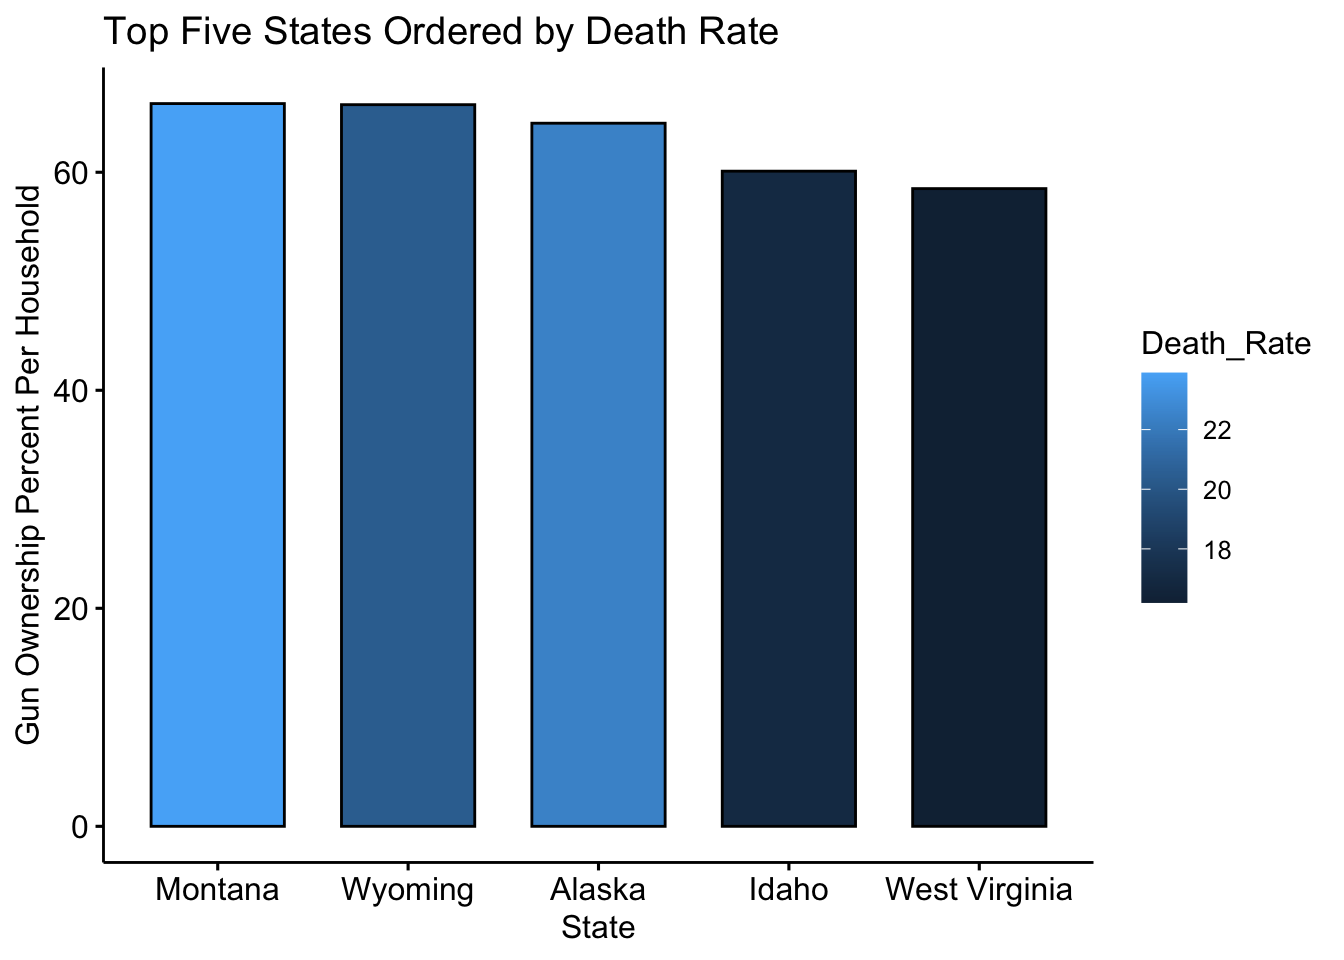

In [ ]:
plot1<- gun_data_con |>
ggbarplot(x = 'State', y = 'Household_pct_ownership',
          fill = "Death_Rate") +
  labs(x = "State", y = "Gun Ownership Percent Per Household",
       title = "Top Five States Ordered by Death Rate") +
  theme(legend.position = "right")
print(plot1)

**Figure 1:** Barplot visualizing the household ownership based on state, colored by death rate. This shows the relationship between household gun ownership percentage and death rate.

Multiple results were determined from the analysis of the shortened dataset. It was determined through Shapiro-Wilk tests that both gun ownership percentage & death rate had a p value greater than 0.05, with a p value of 0.2029 for gun ownerhsip percentage among households, and a p value of 0.5634 for death rates.

In [ ]:
shapiro.test(gun_data_con$Household_pct_ownership)


    Shapiro-Wilk normality test

data:  gun_data_con$Household_pct_ownership
W = 0.85262, p-value = 0.2029


    Shapiro-Wilk normality test

data:  gun_data_con$Death_Rate
W = 0.92511, p-value = 0.5634

**Figure 2:** Results of the Shapiro-Wilk normality test using the Pearson method. The test showed a normal distribution.

Our Pearson method correlation test showed that the variables Household_pct_ownership and Death_Rate had a correlation value of 0.905. The Pearson correlation method was used because the sample data followed a normal distribution. Plotting of Household_pct_ownership on the x-axis and Death_Rate on the y-axis using a ggplot function allowed for visualization of this relationship. A linear regression using death_rate as our predicted variable, and household percent as our predictor variable, was used to determine p value and r squared values to determine if a linear relationship existed. With our sample data being the data used, the model provided a p value of 0.03455, and an R-squared value of 0.7591

In [ ]:
correlation_metric <- cor(gun_data_con$Death_Rate, gun_data_con$Household_pct_ownership,  method = "pearson")
print(correlation_metric)

[1] 0.905166


Call:
lm(formula = Death_Rate ~ Household_pct_ownership, data = gun_data_con)

Residuals:
      1       2       3       4       5 
 1.2544 -2.1618  1.2632 -0.4485  0.0927 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)             -32.9301    14.3636  -2.293   0.1057  
Household_pct_ownership   0.8382     0.2273   3.688   0.0346 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.638 on 3 degrees of freedom
Multiple R-squared:  0.8193,    Adjusted R-squared:  0.7591 
F-statistic:  13.6 on 1 and 3 DF,  p-value: 0.03455

**Figure 3a:** Summary results on linear regression model using gun ownership as a predictor for death rate. The regression shows a strong relationship between household gun ownership percentage and death rate.

`geom_smooth()` using formula = 'y ~ x'

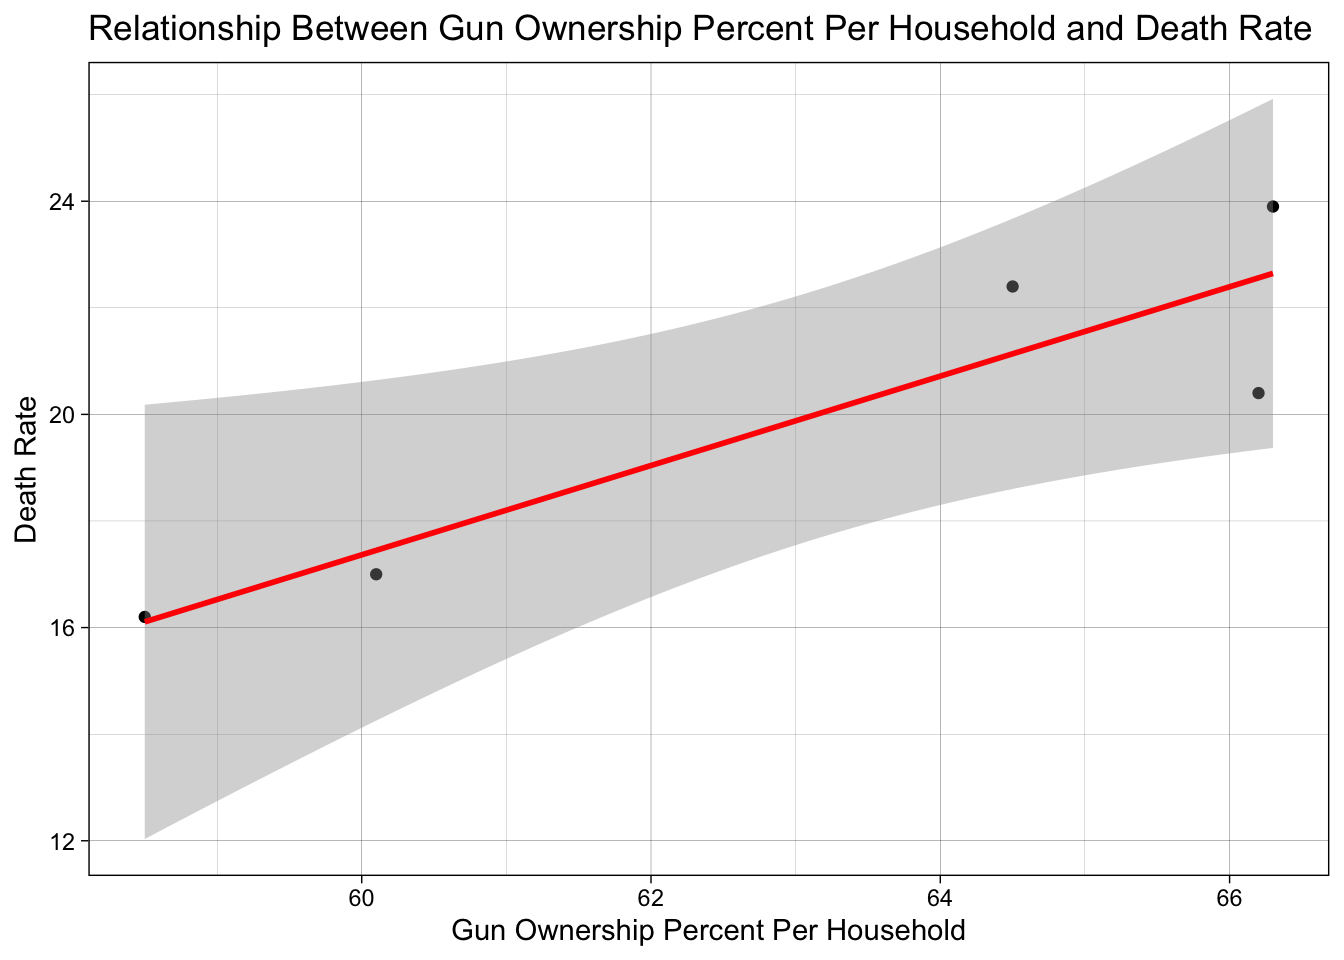

In [ ]:
plot2 <- ggplot(gun_data_con, aes(x = Household_pct_ownership, y = Death_Rate)) +
  geom_point() +
  geom_smooth(method = lm, color = 'red') +
  labs(x = "Gun Ownership Percent Per Household",
       y = "Death Rate",
       title = "Relationship Between Gun Ownership Percent Per Household and Death Rate ") +
  theme_linedraw()
print(plot2)

**Figure 3b:** Graph visualizing the relationship between household gun ownership percentage and death rate. This shows that both variables linearly increase together.

A predicted graph was made to visualize the relationship between gun ownership per household and death rate to determine the accuracy of our model. Using lm(household_pct_ownership ~ death_rate, data = gun_data_con) representing the cleaned dataset with the top 5 states for gun ownership, this fit was applied to the full cleaned dataset and was then visualized. This visualization found that datapoints that had lower gun ownership percentages had higher residual values than those with higher gun ownership percentages.

In [ ]:
rec <- recipe(Household_pct_ownership ~ Death_Rate, data = gun_data_con)
prep <- prep(rec)
baked_data <- bake(prep, new_data = gun_data_con)

lm_pred <- lm(Household_pct_ownership ~ Death_Rate, data = baked_data)
summary(lm_pred)


Call:
lm(formula = Household_pct_ownership ~ Death_Rate, data = baked_data)

Residuals:
      1       2       3       4       5 
-0.6515  2.6695 -0.9854 -0.1073 -0.9253 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  43.5910     5.3535   8.143  0.00387 **
Death_Rate    0.9774     0.2650   3.688  0.03455 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.769 on 3 degrees of freedom
Multiple R-squared:  0.8193,    Adjusted R-squared:  0.7591 
F-statistic:  13.6 on 1 and 3 DF,  p-value: 0.03455

**Figure 4a:** Summary results on linear regression model using death rate as a predictor for gun ownership. The regression shows a strong relationship between death rate and household gun ownership percentage.

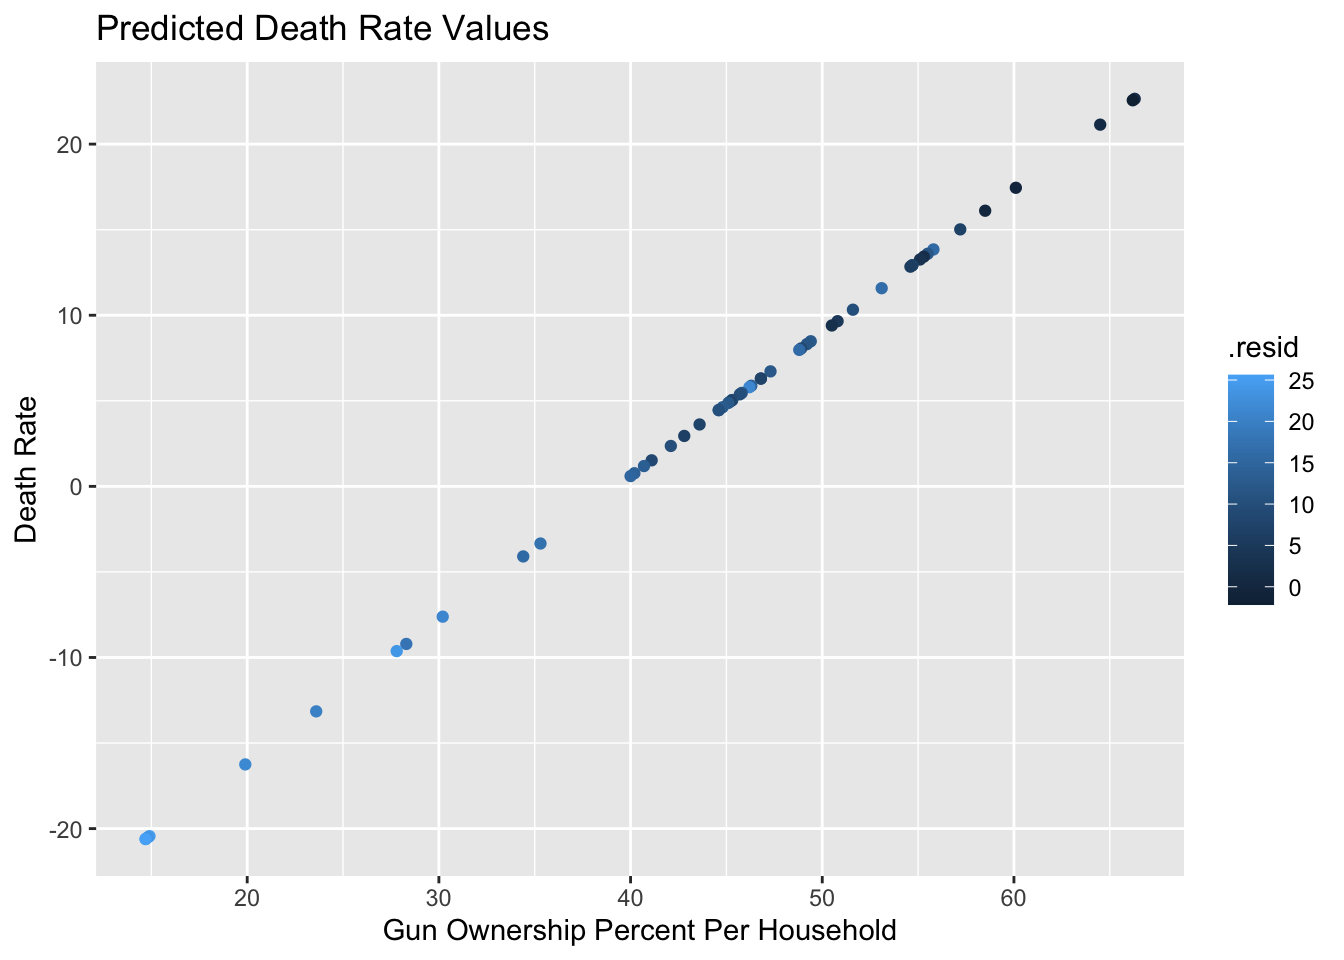

In [ ]:
pred_data <- augment(linear_mod, newdata = gun_data)

pred_data %>%
ggplot(aes(x = Household_pct_ownership, y = .fitted)) +
  geom_point(aes(color = .resid)) +
  labs(x = "Gun Ownership Percent Per Household",
       y = "Death Rate",
       title = "Predicted Death Rate Values")

**Figure 4b:** Graph visualizing predicted death rate values using household ownership percent with a linear regression from the top five states, colored by residuals. This graph shows that residual values increase as data moves away from our sample data.

# Discussion

After completing our analysis, the results showed a strong correlation between gun ownership and gun mortality when focused specifically on the five states with the highest levels of ownership. As displayed in Figure 1, the top five states for gun ownership were Montana, Wyoming, Alaska, Idaho, and West Virginia. Based on the Pearson test, the two variables, firearm ownership and firearm mortality, showed a direct correlation. The resulting correlation value of 0.905 is very close to 1, showing a strong positive correlation between the two variables (Figure 2). Given the results of this test, it made sense to complete a linear regression. From the linear regression, a p-value of 0.03455 was produced (Figure 3a). This showed statistical significance because the value is below 0.05. Additionally, the resulting r-squared value of 0.7591 is between the range of 0.7-0.99, showing significance (Figure 3a). Examining the relationship between the percentage of households that own a firearm and firearm mortality, there was a positive direct correlation. As the percentage of households that own a firearm increases, so does the firearm mortality rate (Figure 3b). In essence, as displayed in Figure 4b, our results show that there is a strong positive correlation between firearm ownership and firearm mortality. Owning a firearm is a direct contributing factor to deaths caused by firearms, at least at the state level. 

In terms of the broader implications of this study, these results may be used as evidence for further reform to firearm ownership requirements in the United States. More restrictions on the number of firearms one person may own could help reduce the number of firearm-related deaths seen in these areas. Additionally, enacting common-sense gun laws that require additional screenings for gun purchasing and the types of firearms available to the public may be necessary. For instance, existing literature exploring the relationship between state firearm restrictions and suicide rates shows that states with background checks, mandatory waiting periods, and prohibited possession show lower suicide rates than states without these same regulations (@kawano2023restrictive). If the states with fewer and more regulated firearms have fewer deaths caused by firearms, it makes sense to place limits and additional restrictions on the number of firearms one may possess. 

In terms of areas for improvement, this study contains a few limitations. One limitation is the scope of this project. For simplicity’s sake, our project focused on the top five states with the highest levels of gun ownership. However, given that there are 50 states within the United States, this means only 10 percent of the total states were included in the analysis. In future analysis, more, if not all, of the states could be included to fully understand the correlation present. Alternatively, in addition to the top five states for ownership, this study could have included the bottom 5 states for ownership to provide a comparison at the other end of the spectrum. Additionally, our study is limited in terms of supplemental data sets. While this study provides a clear correlation between gun ownership and gun mortality, it is lacking in additional variables and contributing factors. As described in an article by the American Psychological Association, many risk factors may increase one’s likelihood of participating in gun violence, resulting in firearm mortality. These factors include lack of employment, socioeconomic status, safety concerns, and community distress (@wamser2021understanding). Finding relevant and corresponding data sets could help extend the analysis in this study and quantify the impact of these specific risk factors on firearm mortality. 

Furthermore, this study relates to the broader field of data science by showing how data science can be employed as a tool to inform social issues. This type of study is important as it takes raw data and transforms it into something tangible for the public and government leaders to understand. As illustrated in a ScienceDirect article, data science is crucial in helping make informed policy decisions in government, from the municipal to the federal level. Just as data science can provide insight and key visualizations into a city’s transportation sector, it can also be used to inform decisions regarding firearm regulations (@matheus2020data). Rather than developing policy decisions purely based on ideas of what might be going on, this study supports reformed gun laws through concrete evidence. This is also a demonstration of how data science can be used to model and address complex, real-world problems such as gun mortality in the United States. Studies such as this also contribute to clearer communication of results within the scientific community. Being able to produce compelling charts, graphs, and visualizations makes data easier to digest for a lay audience. For instance, in this study, Figures 4 and 5 display the linear regression relating firearm ownership and mortality, clearly representing this relationship. While the average American may not have knowledge of a Pearson test or be familiar with the verbiage of a linear regression, they likely have a basic understanding of graphs and can identify a linear relationship. Making studies like this available to the public is key in contributing to informed policy decisions and bridging the gap between data and real-world implications.

As for next steps, replication of the Pearson correlation test and linear regression using more states would be ideal. Addressing one of the study’s limitations, this would provide even greater evidence for the correlation identified through this study. At this point, the correlation identified in this study could be used as evidence for reform to the current firearm ownership process. Encouraging restrictions on how many firearms may be purchased by a single individual or requiring additional screenings would be one approach. 

Additional variables and risk factors may be added to this analysis for even greater and potentially more specific evidence. If taking this approach, narrowing the region of focus to the county level may also be advantageous. Moreover, data on firearm type could also be studied. Data identifying gun ownership by type of gun (e.g., handgun, hunting rifle, shotgun), semi-automatic, and automatic, may be used to provide more specific insight into the firearm regulation needed. For example, if findings illustrate that areas with a higher number of automatic rifles also have the highest number of firearm mortality, this may be used as evidence for placing further restrictions on automatic rifle ownership. If using firearm type as a contributing variable, it may be necessary to also find more specific data on firearm mortality rates. Specifically, within the firearm mortality data, identifying what type of firearm that was responsible for the mortality. With these changes, it may be possible to identify which firearms contribute most to firearm mortality and if there is a correlation between ownership of these types of firearms and mortality caused by them.

# Conclusion

Overall, the Pearson test performed in this analysis resulted in a statistically significant R-squared and p-value. Likewise, the linear regression demonstrated a clear positive correlation between firearm ownership and firearm mortality within the top five states for firearm ownership. This study contributed to the growing evidence that further restrictions on firearm ownership are necessary. Evidence suggests that with a smaller percentage of households owning firearms, it is likely that firearm mortality will decrease. Furthermore, this study serves as a starting point for investigations into other contributing factors of firearm mortality, in order to make specific and impactful firearm restrictions.  

# References